# K-nearest neighbours model 

We decided to pick k nearest neighbours (KNN) for one of our models as it is a classification model and works best with fewer features which means that we can explore the relationship between 2 features more in depth (How does that sound)

List of things to do:<br>
    -hyperparameter tuning!!!!<br>
    -ROC curves

## /////////////////////////////////////////////

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve,cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, classification_report,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")

<br />



# 1.0 Loading data and setting up the model


<br>

## 1.1 collecting data and getting features/labels

We must first start off by scaling the features, a __ scaler is required since KNN requires the calculation of euclidian distance which could heavily skew the result if unaltered.

In [3]:
dfWDBC = pd.read_csv("Data Exploration/wdbc.csv")

#split into test and features
features = dfWDBC[["Symmetry","FractalDimension"]]
label = dfWDBC["B/M"]

#Need to encode B/M before proceeding
le = LabelEncoder()
label = le.fit_transform(label)
label = pd.DataFrame(data = label, columns = ["B/M"])


#Need to encode the features
ss = StandardScaler()
features = ss.fit_transform(features)

<br />


##  1.2 Splitting the data using stratified sampling

The data is split into training and test data with a 4:1 split respectively. This split is also stratified so there is a representive ammount of benign and malignant tumors in both the test and training data

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, stratify = label["B/M"].values, random_state= 1)

</br>

#  2 Establishing Model and Model Evaluation

<br>

## 2.2 Fitting the model

In [5]:
k = 7
model = KNeighborsClassifier(n_neighbors=k, weights= "uniform", p=5)
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=7, p=5)

<br>

## 2.3 Testing the Accuracy

In [6]:
print("Test Size = " + str(len(y_test)))
y_pred = model.predict(x_test)
print("Accuracy Score = " + str(accuracy_score(y_test,y_pred)))

c = confusion_matrix(y_test, y_pred)
print(f'True negatives: {c[0][0]}')
print(f'False negatives: {c[1][0]}')
print(f'True positives: {c[1][1]}')
print(f'False positives: {c[0][1]}')
print("\n\n\n")

print(classification_report(y_test, y_pred))

Test Size = 114
Accuracy Score = 0.6666666666666666
True negatives: 58
False negatives: 24
True positives: 18
False positives: 14




              precision    recall  f1-score   support

           0       0.71      0.81      0.75        72
           1       0.56      0.43      0.49        42

    accuracy                           0.67       114
   macro avg       0.63      0.62      0.62       114
weighted avg       0.65      0.67      0.65       114



## 2.4 visualising model (Takes a lot of time to compute)

<IPython.core.display.Javascript object>


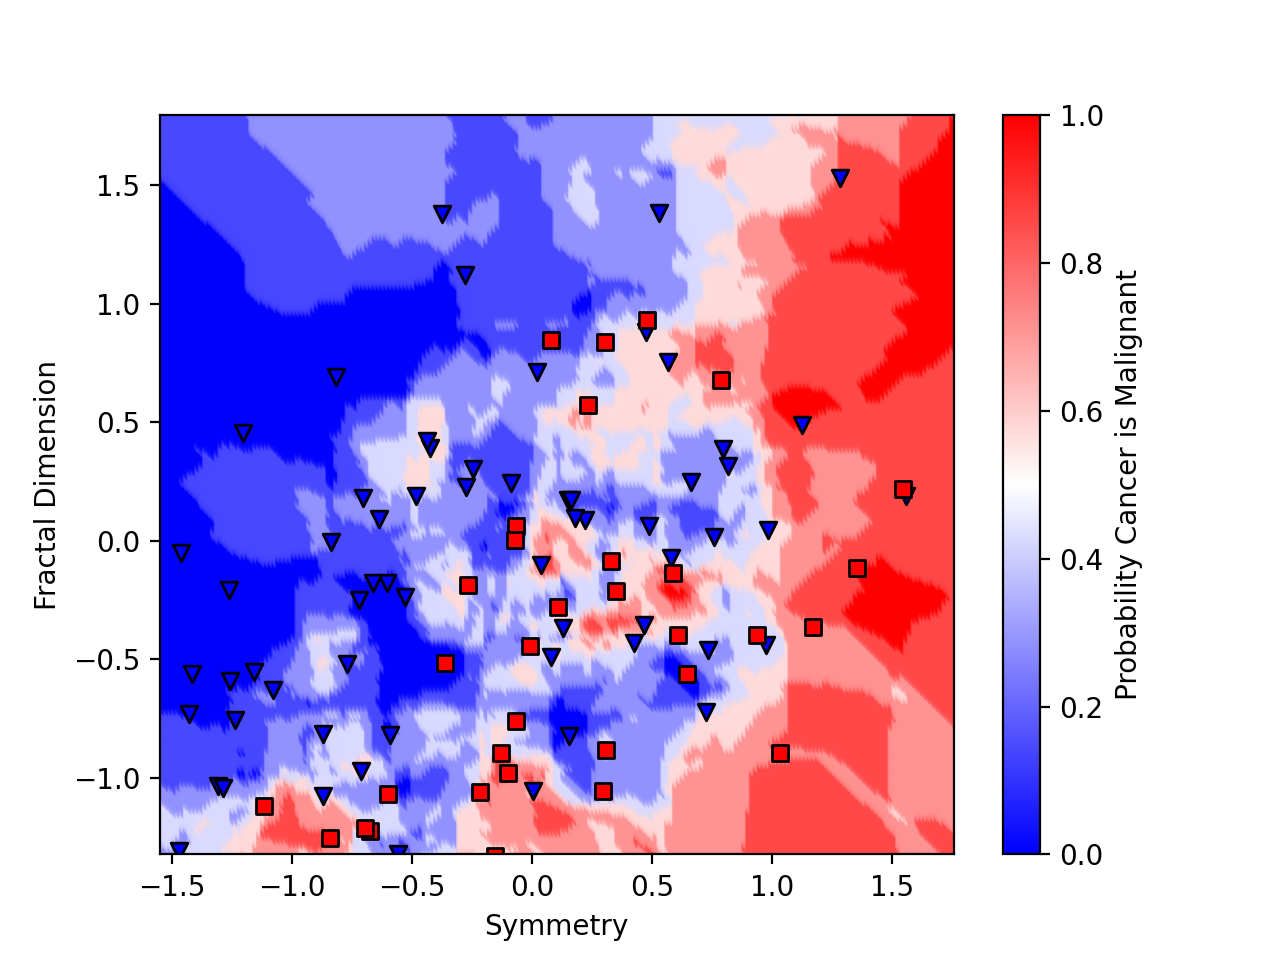

In [53]:
%matplotlib notebook
xs = np.linspace(-3,5,500)
ys = np.linspace(-3,5,500)
xv,yv = np.meshgrid(xs,ys)
prob = []
for x in xs:
    for y in ys:
        prob.append(model.predict_proba([[x,y]])[0][1])
plt.scatter(yv,xv, c = prob, cmap="bwr",alpha = 0.5)

xM = []
yM = []
xB = []
yB = []
z = y_test["B/M"].tolist()

for i in range(len(z)):
    if z[i] == 1:
        xM.append(x_test[i][0])
        yM.append(x_test[i][1])
    else:
        xB.append(x_test[i][0])
        yB.append(x_test[i][1])

plt.scatter(xB,yB,linewidths=1, edgecolors= "black", color = "blue",marker = "v")
plt.scatter(xM,yM,linewidths=1, edgecolors= "black", color = "red", marker = "s")
colormap = plt.cm.get_cmap("bwr")
sm = plt.cm.ScalarMappable(cmap=colormap)
cb = plt.colorbar(sm)
cb.ax.set_ylabel('Probability Cancer is Malignant')
plt.xlabel("Symmetry")
plt.ylabel("Fractal Dimension")
plt.show()


<br>

## 2.5 Learning Curves to test overf/under fitting in data

<IPython.core.display.Javascript object>


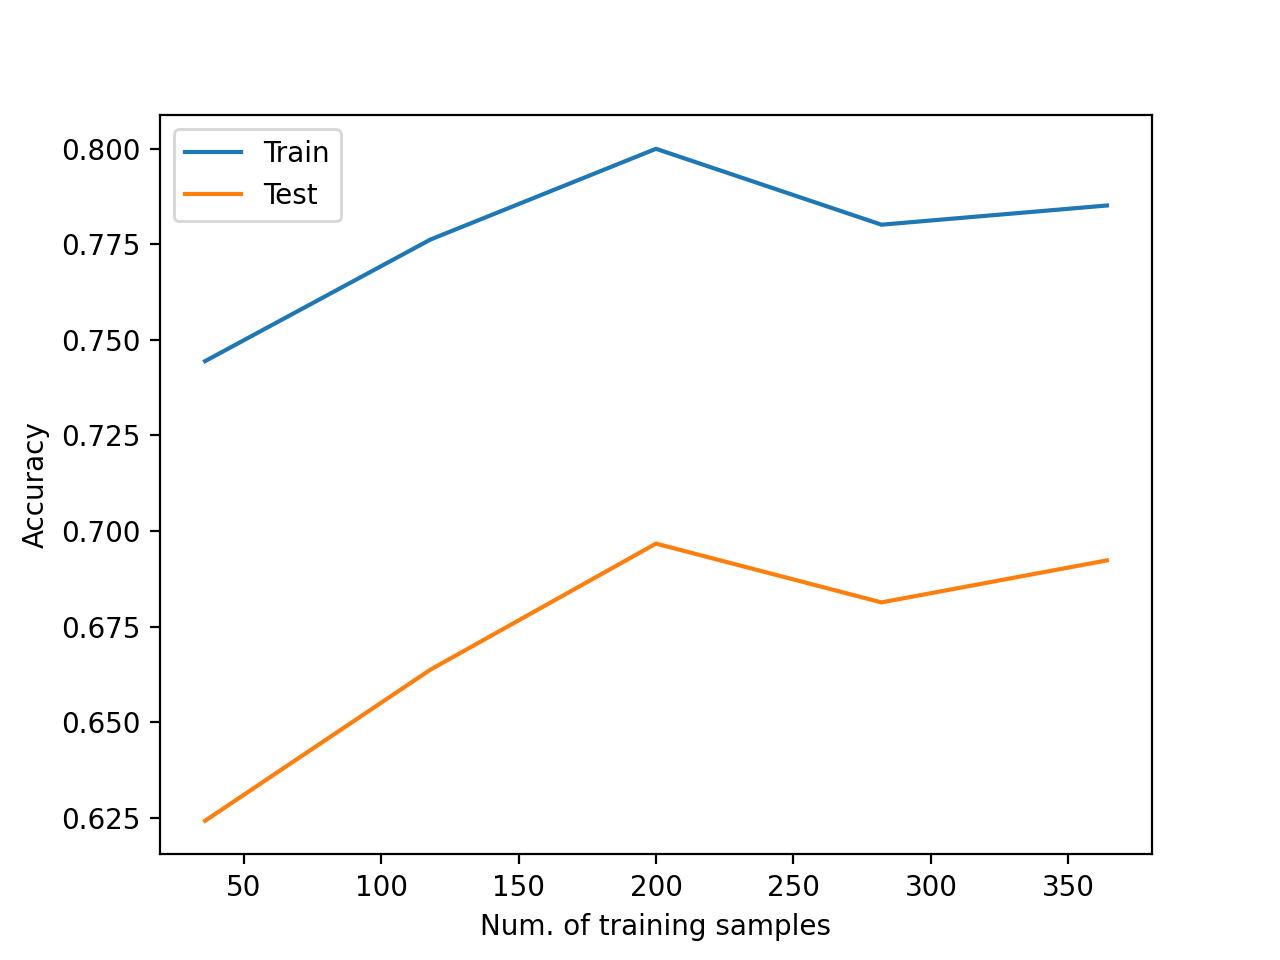

In [8]:
%matplotlib notebook
train_sizes_abs, train_scores, test_scores = learning_curve(estimator=KNeighborsClassifier(), X=x_train, y=y_train)

train_avg, test_avg = [], []

for i in range(len(train_sizes_abs)):
    train_avg.append(np.average(train_scores[i]))
    test_avg.append(np.average(test_scores[i]))

plt.plot(train_sizes_abs, train_avg)
plt.plot(train_sizes_abs, test_avg)
plt.legend(['Train', 'Test'])
plt.xlabel('Num. of training samples')
plt.ylabel('Accuracy')
plt.show()

Need to research into learning curves fully to finish write up

## 2.6 Hyperparameter Tuning

<IPython.core.display.Javascript object>


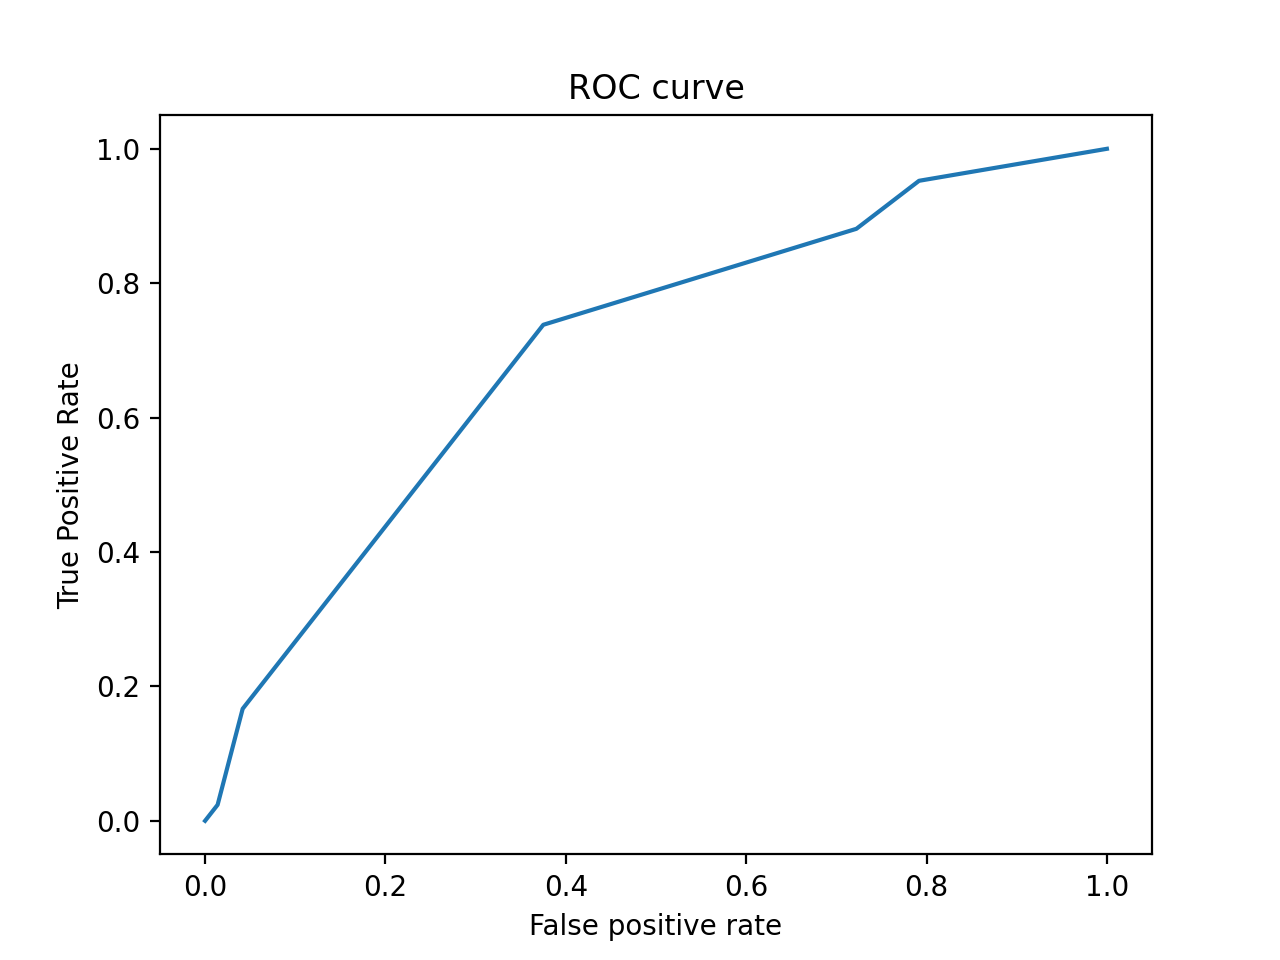

In [9]:
%matplotlib notebook
y_pred_prob = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label = 1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.show()

# Using GRID SEARCH CV (Cross Validation) for hyperparameter tuning

In [13]:
knn2 = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 25),"weights": ["uniform","distance"],"p":np.arange(2,25)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(features, label)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'p': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'weights': ['uniform', 'distance']})

In [14]:
knn_gscv.best_params_

{'n_neighbors': 7, 'p': 5, 'weights': 'uniform'}

In [15]:
knn_gscv.best_score_

0.7153237074988357